In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Supervised Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC as SVC

#Unsupervised Learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [372]:
#api key and Ticker
API_KEY = 'ec2d6f3b0cc9395fbce02f1316669229'

In [373]:
#Google
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/GOOGL?type=sma&period=10&apikey={API_KEY}'
googl = pd.read_json(url)

In [374]:
#Apple
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/AAPL?type=sma&period=10&apikey={API_KEY}'
aapl = pd.read_json(url)

In [375]:
#Walmart
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/WMT?type=sma&period=10&apikey={API_KEY}'
wmt = pd.read_json(url)

In [376]:
#Amazon
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/AMZN?type=sma&period=10&apikey={API_KEY}'
amzn = pd.read_json(url)

In [377]:
for x in [googl, aapl, wmt, amzn]:
    x.set_index('date', inplace=True)

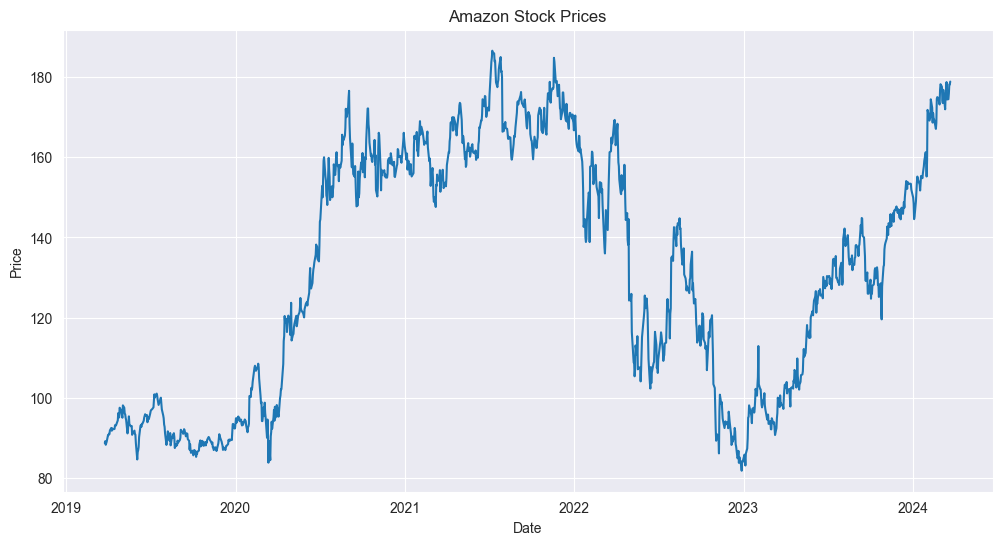

In [378]:
#amazon
plt.figure(figsize=(12,6))
plt.plot(amzn['close'])
plt.title('Amazon Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [379]:
#close min
amzn['close'].min()

81.82

In [380]:
#close max
amzn['close'].max()

186.57

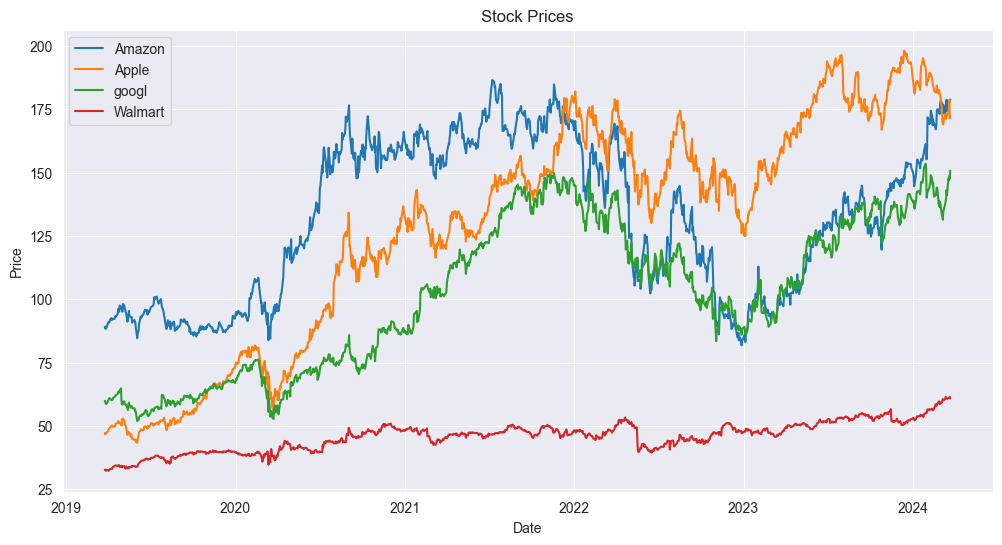

In [381]:
#plotting the data
plt.figure(figsize=(12,6))
plt.plot(amzn['close'], label='Amazon')
plt.plot(aapl['close'], label='Apple')
plt.plot(googl['close'], label='googl')
plt.plot(wmt['close'], label='Walmart')
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [382]:
#concatenating the data
stocks = pd.concat([amzn['close'], aapl['close'], googl['close'], wmt['close']], axis=1)

In [386]:
#renaming the columns
stocks.columns = ['Amazon', 'Apple', 'Google', 'Walmart']

In [388]:
stocks.corr()

,Amazon,Apple,Google,Walmart
Amazon,1.000000,0.535258,0.660651,0.568913
Apple,0.535258,1.000000,0.902329,0.866257
Google,0.660651,0.902329,1.000000,0.777139
Walmart,0.568913,0.866257,0.777139,1.000000


<AxesSubplot: >

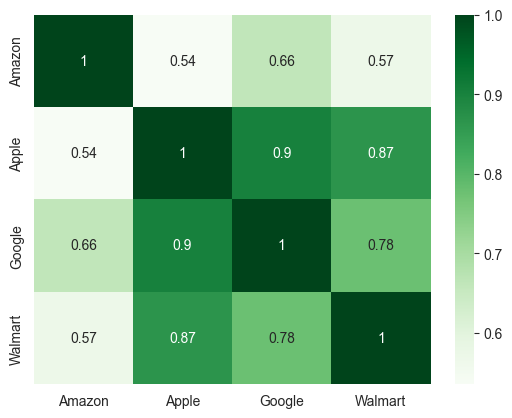

In [401]:
sns.heatmap(stocks.corr(), annot=True, cmap='Greens')

## Supervised Learning Techniques

In [100]:
#make date the index
amzn = amzn.set_index('date')

In [101]:
#Percentahe change by day
amzn['pct_change'] = amzn['close'].pct_change() #

In [102]:
#change in direction
amzn['direction'] = np.where(amzn['pct_change'] > 0, 'Up', 'Down')

In [103]:
#drop the first row
amzn = amzn.dropna()

In [104]:
amzn['direction'].value_counts()

Down    657
Up      601
Name: direction, dtype: int64

In [105]:
#splitting the data
x = amzn[['open','high','low','close','volume']]
y = amzn.direction

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42) #0,25 means 25% of the data is used for testing

In [153]:
#Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Decision Tree Classifier')
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

#Compariosn with the cross validation
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

Decision Tree Classifier
Confusion Matrix:
  [[84 84]
 [72 75]]
Accuracy Score:  0.5047619047619047


,Actual,Predicted
date,,
2021-12-27,Down,Down
2023-10-25,Up,Down
2024-01-08,Down,Up
2023-12-19,Up,Up
2019-12-13,Down,Down
...,...,...
2023-01-23,Up,Up
2020-02-28,Down,Down
2023-08-29,Down,Down


In [141]:
comparison['Predicted'].value_counts()

Up      160
Down    155
Name: Predicted, dtype: int64

In [152]:
#SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('SVC')
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

#Comparison with the cross validation
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

SVC
Confusion Matrix:
  [[155  13]
 [137  10]]
Accuracy Score:  0.5238095238095238


,Actual,Predicted
date,,
2021-12-27,Down,Down
2023-10-25,Up,Down
2024-01-08,Down,Down
2023-12-19,Up,Down
2019-12-13,Down,Down
...,...,...
2023-01-23,Up,Down
2020-02-28,Down,Up
2023-08-29,Down,Down


In [146]:
comparison['Predicted'].value_counts()

Down    292
Up       23
Name: Predicted, dtype: int64

In [147]:
#Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Logistic Regression')
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

#Comparison with the cross validation
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

Confusion Matrix:
  [[168   0]
 [147   0]]
Accuracy Score:  0.5333333333333333


,Actual,Predicted
date,,
2021-12-27,Down,Down
2023-10-25,Up,Down
2024-01-08,Down,Down
2023-12-19,Up,Down
2019-12-13,Down,Down
...,...,...
2023-01-23,Up,Down
2020-02-28,Down,Down
2023-08-29,Down,Down


In [148]:
comparison['Predicted'].value_counts()

Down    315
Name: Predicted, dtype: int64

In [160]:
#Random Forest Classifier
model = RandomForestClassifier(n_estimators=100) #100 trees
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Random Forest Classifier')
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

#Comparison with the cross validation
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

Random Forest Classifier
Confusion Matrix:
 [[91 77]
 [80 67]]
Accuracy Score:  0.5015873015873016


,Actual,Predicted
date,,
2021-12-27,Down,Down
2023-10-25,Up,Down
2024-01-08,Down,Up
2023-12-19,Up,Up
2019-12-13,Down,Down
...,...,...
2023-01-23,Up,Up
2020-02-28,Down,Down
2023-08-29,Down,Down


In [150]:
comparison['Predicted'].value_counts()

Down    177
Up      138
Name: Predicted, dtype: int64